In [1]:
! pip install textblob

In [5]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from urllib import request as req  
import re

headers={"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
#設置網站
url = 'https://www.imdb.com/title/tt1517268/reviews?ref_=tt_urv'
response = requests.get(url)

# 使用 BeautifulSoup 解析
soup = BeautifulSoup(response.text, 'html.parser')

# 這裡只找尋所有的 span 標籤
comments = soup.find_all("div",class_="text show-more__control")

comments


[<div class="text show-more__control">Margot does the best with what she's given, but this film was very disappointing to me. It was marketed as a fun, quirky satire with homages to other movies. It started that way, but ended with over-dramatized speeches and an ending that clearly tried to make the audience feel something, but left everyone just feeling confused. And before you say I'm a crotchety old man, I'm a woman in my 20s, so I'm pretty sure I'm this movie's target audience. The saddest part is there were parents with their kids in the theater that were victims of the poor marketing, because this is not a kid's movie. Overall, the humor was fun on occasion and the film is beautiful to look at, but the whole concept falls apart in the second half of the film and becomes a pity party for the "strong" woman.</div>,
 <div class="text show-more__control">Before making Barbie (2023), <a href="/name/nm1950086/">Greta Gerwig</a> single-handedly directed two films: <a href="/title/tt492

In [6]:
# 將 ResultSet 轉換為字符
text = "\n".join([comment.get_text() for comment in comments])

In [13]:
# 定义需要删除的连接词列表
stopwords = r"\b(?:and|is|in|the|on|of|to|for|a|were|was)\b"

# 清理文本
cleaned_text = re.sub(r'[!@#$%^&*()_+{}[\]:;"\'<>,.?~\\/\-|=]', '', text)

# 去除停用词
cleaned_text = re.sub(stopwords, '', cleaned_text, flags=re.IGNORECASE)

# 去除数字
cleaned_text = re.sub(r'\b\d+\b', '', cleaned_text)

# 去除空白字符
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

# 打印清理后的文本
cleaned_text


'Margot does best with what shes given but this film very disappointing me It marketed as fun quirky satire with homages other movies It started that way but ended with overdramatized speeches an ending that clearly tried make audience feel something but left everyone just feeling confused before you say Im crotchety old man Im woman my 20s so Im pretty sure Im this movies target audience saddest part there parents with their kids theater that victims poor marketing because this not kids movie Overall humor fun occasion film beautiful look at but whole concept falls apart second half film becomes pity party strong woman Before making Barbie Greta Gerwig singlehandedly directed two films Lady Bird Little Women Both about girls precipice adolescence both had nuanced layered portrayals motherdaughter relationships both combined imaginative visuals with clever dialogue Both very very good Given those credentials one may expect Barbie be as intelligent convincing amusing picture well it isn

In [14]:
# 使用 TextBlob 创建一个 TextBlob 对象
blob = TextBlob(cleaned_text)

# 获取单词列表
words = blob.words

# 打印单词列表
print(words)

['Margot', 'does', 'best', 'with', 'what', 'shes', 'given', 'but', 'this', 'film', 'very', 'disappointing', 'me', 'It', 'marketed', 'as', 'fun', 'quirky', 'satire', 'with', 'homages', 'other', 'movies', 'It', 'started', 'that', 'way', 'but', 'ended', 'with', 'overdramatized', 'speeches', 'an', 'ending', 'that', 'clearly', 'tried', 'make', 'audience', 'feel', 'something', 'but', 'left', 'everyone', 'just', 'feeling', 'confused', 'before', 'you', 'say', 'Im', 'crotchety', 'old', 'man', 'Im', 'woman', 'my', '20s', 'so', 'Im', 'pretty', 'sure', 'Im', 'this', 'movies', 'target', 'audience', 'saddest', 'part', 'there', 'parents', 'with', 'their', 'kids', 'theater', 'that', 'victims', 'poor', 'marketing', 'because', 'this', 'not', 'kids', 'movie', 'Overall', 'humor', 'fun', 'occasion', 'film', 'beautiful', 'look', 'at', 'but', 'whole', 'concept', 'falls', 'apart', 'second', 'half', 'film', 'becomes', 'pity', 'party', 'strong', 'woman', 'Before', 'making', 'Barbie', 'Greta', 'Gerwig', 'singleh

In [15]:
# 获取情感分析的结果
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# 打印情感分析的结果
print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")


Polarity: 0.16968857385524058
Subjectivity: 0.5458721221221222


In [16]:
# 根据极性进行简单的情感分类
if polarity > 0.1:
    sentiment = "Positive"
elif polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

# 打印情感分析的结果
print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")
print(f"Sentiment: {sentiment}")

Polarity: 0.16968857385524058
Subjectivity: 0.5458721221221222
Sentiment: Positive


Comment 1: Polarity: 0.1030833333333333
Comment 2: Polarity: 0.2338915343915344
Comment 3: Polarity: 0.26395833333333324
Comment 4: Polarity: 0.007291666666666655
Comment 5: Polarity: 0.13674242424242428
Comment 6: Polarity: 0.1744047619047619
Comment 7: Polarity: 0.2896739130434783
Comment 8: Polarity: 0.14340136054421765
Comment 9: Polarity: -0.013888888888888888
Comment 10: Polarity: 0.20069444444444448
Comment 11: Polarity: 0.13582130832130834
Comment 12: Polarity: 0.3324123588829471
Comment 13: Polarity: 0.10426356589147287
Comment 14: Polarity: 0.2850694444444445
Comment 15: Polarity: 0.05435938330675173
Comment 16: Polarity: 0.23070887445887442
Comment 17: Polarity: 0.4693452380952381
Comment 18: Polarity: 0.17010732323232325
Comment 19: Polarity: -0.3127777777777777
Comment 20: Polarity: 0.11872222222222222
Comment 21: Polarity: 0.2076923076923077
Comment 22: Polarity: 0.06008597883597885
Comment 23: Polarity: 0.1916666666666667
Comment 24: Polarity: 0.06122807017543858
Comment

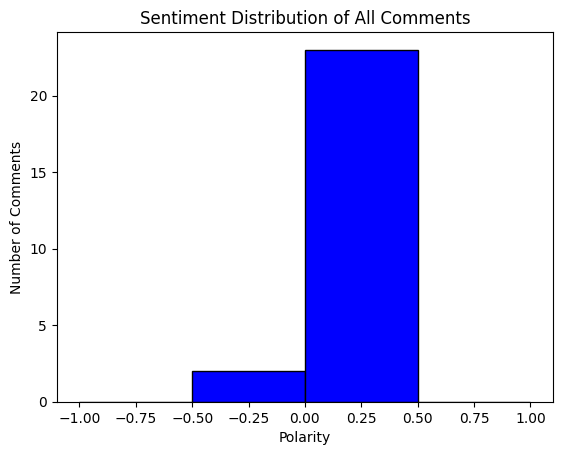

In [23]:
import matplotlib.pyplot as plt
# 找尋所有的 span 標籤
comments = soup.find_all("div", class_="text show-more__control")

# 获取每条评论的文本并进行情感分析
sentiments = []

for i, comment in enumerate(comments, start=1):
    comment_text = comment.get_text()
    
    # 清理文本
    cleaned_text = re.sub(r'[!@#$%^&*()_+{}[\]:;"\'<>,.?~\\/\-|=]', '', comment_text)
    
    # 去除停用词
    cleaned_text = re.sub(r'\b(?:and|is|in|the|on|of|to|for)\b', '', cleaned_text, flags=re.IGNORECASE)
    
    # 去除数字
    cleaned_text = re.sub(r'\b\d+\b', '', cleaned_text)
    
    # 去除空白字符
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    # 使用 TextBlob 创建一个 TextBlob 对象
    blob = TextBlob(cleaned_text)
    
    # 获取情感分析的结果
    polarity = blob.sentiment.polarity
    
    # 打印情感分析的结果
    print(f"Comment {i}: Polarity: {polarity}")
    
    # 存储情感分析结果
    sentiments.append(polarity)

# 整体情感分布可视化
plt.hist(sentiments, bins=[-1, -0.5, 0, 0.5, 1], color='blue', edgecolor='black')
plt.title('Sentiment Distribution of All Comments')
plt.xlabel('Polarity')
plt.ylabel('Number of Comments')
plt.show()